# Boat Sales  Clustering Analysis

### Page Content
1. What is clustering
2. Import Libraries & Load data set 
3. Standardize all columns
4. The Elbow Technique
5. K-MEANS Clustering
6. Data Analysis
7. Summary

### 1. What is clustering

Clustering, as its name implies, is all about clustering, or grouping, data points in a meaningful way in order to identify similar subgroups (clusters) within the data. The goal of clustering is to locate groups of similar objects, for instance, customers with similar buying behaviors in the Instacart example.

The type of clustering you’ll be looking at in this Exercise is centroid-based clustering. Centroid-based clustering assigns a center (centroid) to a defined number of clusters and ensures that each center is surrounded by data points in such a way that every data point is at the closest possible point to its centroid. This is a complicated way of saying each cluster will have a central point. In the example above, these central points are represented by stars.

While there are a few different algorithms you can use for centroid-based clustering, the most common is the k-means algorithm. The k-means algorithm is not only easy to understand and use, it’s also incredibly powerful, making it a popular choice for clustering procedures. One thing you should note, however, is that it can only be used with numerical, as opposed to categorical, variables.

To use the k-means algorithm, you start by determining the desired number of clusters (k) you want it to create. Each data point can only be assigned to a single cluster. As such, the algorithm starts by picking one random centroid for each cluster. This center will continue to change. That’s because the k-means algorithm works by iteratively calculating the distance between a data point and the centroid of each cluster and, in the process, moving the centroid so that it’s situated as close as possible to all the data points within the cluster. In the end, all of the points within one group will be closer in distance to their cluster’s centroid than they are to any of the other centroids.

### 2. Import libraries & Load Data

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") 

# additional libraries to be imported for this exercise
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [28]:
# Set path to access data files
path = r'C:\Users\tsoew\OneDrive\Desktop\Boat Sales Analysis'

In [62]:
# Import data file that has been prepared for regression analysis
# It contains only new boat set
# df = pd.read_csv (os.path.join(path, 'Data', 'Prepared Data', 'regression_data.csv'), index_col=False)

# try to use the full version of data set
df1 = pd.read_csv (os.path.join(path, 'Data', 'Prepared Data', 'boat_data_final.csv'), index_col=False)


In [63]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [64]:
# Check data head
df1.head(10)

,Boat Type,Length,Width,Views,Price_USD,Country,Age,Condition
0,Motor Yacht,4.00,1.90,226,3667.363,Switzerland,7,new
1,Center console boat,4.00,1.50,75,3751.750,Germany,4,new
2,Sport Boat,3.00,1.00,64,3703.700,Denmark,4,new
3,Fishing Boat,3.55,1.46,58,3653.925,Germany,5,new
4,Catamaran,6.20,2.38,474,3956.400,Switzerland,25,Used
5,Fishing Boat,3.64,1.37,45,3582.975,Germany,5,new
6,Pontoon Boat,4.35,1.73,180,3547.500,Italy,6,new
7,Fishing Boat,4.35,1.75,239,3846.500,Switzerland,37,Used
8,Sport Boat,4.70,2.00,69,3762.500,Italy,20,Used
9,Runabout,4.40,1.65,113,5055.400,Switzerland,4,new


In [65]:
df1.shape

(9233, 8)

In [66]:
df1.rename(columns = {'Price_USD' : 'Price'}, inplace=True)

In [67]:
df = df1.drop(['Boat Type', 'Country', 'Condition'], axis=1)

In [68]:
df.shape

(9233, 5)

### 3. Standardize all columns in dataframe

In [69]:
# Z-Score using pandas 
df['Price'] = (df['Price'] - df['Price'].mean()) / df['Price'].std() 
df['Length'] = (df['Length'] - df['Length'].mean()) / df['Length'].std() 
df['Width'] = (df['Width'] - df['Width'].mean()) / df['Width'].std() 
df['Views'] = (df['Views'] - df['Views'].mean()) / df['Views'].std() 
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std() 

In [70]:
df.head(10)

,Length,Width,Views,Price,Age
0,-1.288275,-1.371472,0.486628,-0.317716,-0.736508
1,-1.288275,-1.703368,-0.486570,-0.317632,-0.919593
2,-1.455086,-2.118239,-0.557465,-0.317680,-0.919593
3,-1.363340,-1.736558,-0.596135,-0.317729,-0.858564
4,-0.921291,-0.973196,2.084991,-0.317430,0.361998
5,-1.348327,-1.811234,-0.679920,-0.317800,-0.858564
6,-1.229891,-1.512528,0.190157,-0.317835,-0.797536
7,-1.229891,-1.495933,0.570413,-0.317539,1.094335
8,-1.171507,-1.288498,-0.525240,-0.317622,0.056857
9,-1.221551,-1.578907,-0.241659,-0.316341,-0.919593


### 4. The Elbow Technique

In [71]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

In [72]:
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [73]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

In [74]:
score

[-46160.00000000016,
 -34327.078374726116,
 -27971.06849659625,
 -23028.739497968723,
 -19379.712162736258,
 -16538.14545922348,
 -14343.68620055856,
 -12895.059108031175,
 -11619.436122069692]

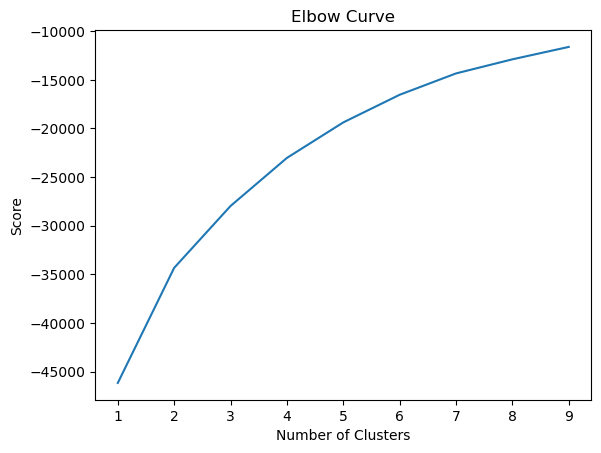

In [75]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Note:
Based on the steepness of the curve we will divide data into 4 clusters

### 5. K-MEANS Clustering

In [76]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [77]:
# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=4)

In [78]:
df['clusters'] = kmeans.fit_predict(df)

In [79]:
df.head()

,Length,Width,Views,Price,Age,clusters
0,-1.288275,-1.371472,0.486628,-0.317716,-0.736508,2
1,-1.288275,-1.703368,-0.486570,-0.317632,-0.919593,2
2,-1.455086,-2.118239,-0.557465,-0.317680,-0.919593,2
3,-1.363340,-1.736558,-0.596135,-0.317729,-0.858564,2
4,-0.921291,-0.973196,2.084991,-0.317430,0.361998,3


In [80]:
df.shape

(9233, 6)

In [82]:
# transfer the cluster column into the first dataframe, for visualisation purpose with Tableau
df1['Cluster'] = df['clusters']

In [83]:
df1

,Boat Type,Length,Width,Views,Price,Country,Age,Condition,Cluster
0,Motor Yacht,4.00,1.90,226,3667.363,Switzerland,7,new,2
1,Center console boat,4.00,1.50,75,3751.750,Germany,4,new,2
2,Sport Boat,3.00,1.00,64,3703.700,Denmark,4,new,2
3,Fishing Boat,3.55,1.46,58,3653.925,Germany,5,new,2
4,Catamaran,6.20,2.38,474,3956.400,Switzerland,25,Used,3
...,...,...,...,...,...,...,...,...,...
9228,Fishing Boat,6.00,1.62,288,5440.050,Switzerland,40,Used,3
9229,Sport Boat,6.30,2.44,1116,5385.100,Switzerland,37,Used,3
9230,Sport Boat,4.40,1.80,354,4836.425,Germany,4,new,2
9231,Pontoon Boat,4.37,1.89,266,4622.500,Italy,6,new,2


#### 5.a. Plot the clusters for the "Price" and "Length" variables.

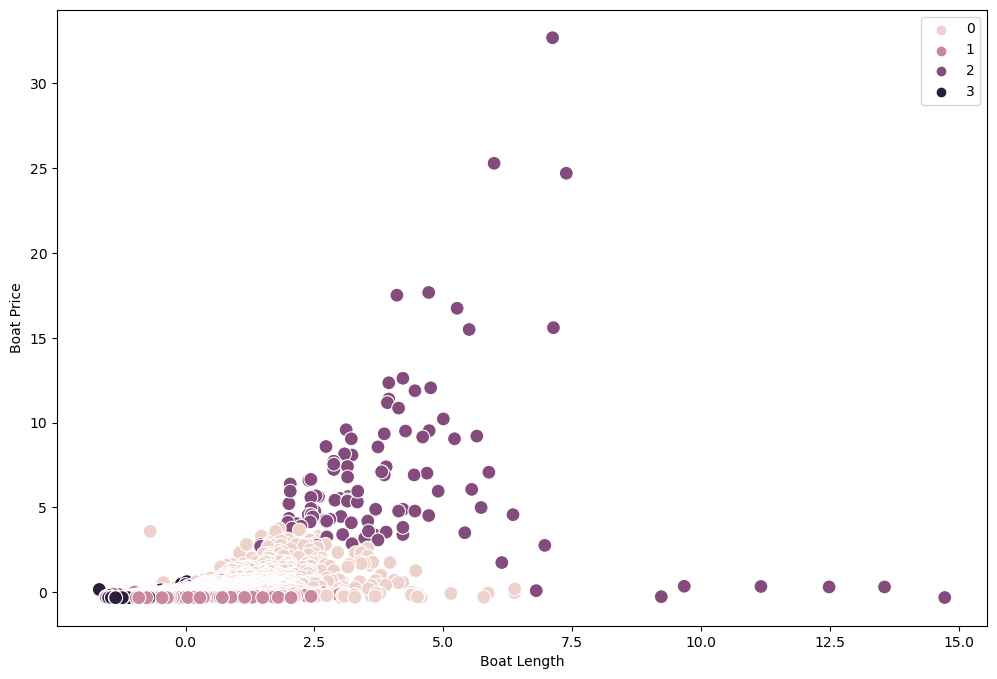

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.
# labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Boat Length') # Label x-axis.
plt.ylabel('Boat Price') # Label y-axis.
plt.show()

#### Note:

- First cluster (black) represents a small number of med to large size boats with med to high price.
- Second cluster (light pink) represents a high concentration of smaller boats with low price.
- Third cluster (pink) represents small boats with very low price.
- Fourth cluster (purple) represents small to med size boats with very low pricce.
- **Conclusion**: There are a high concentration of smaller boats with low price, and price
    range increase significantly after it reaches a medium size boats. This may include the
    luxury boats such as yachts.
  
    

#### 5.b. Plot the clusters for the "Price" and "Age" variables.

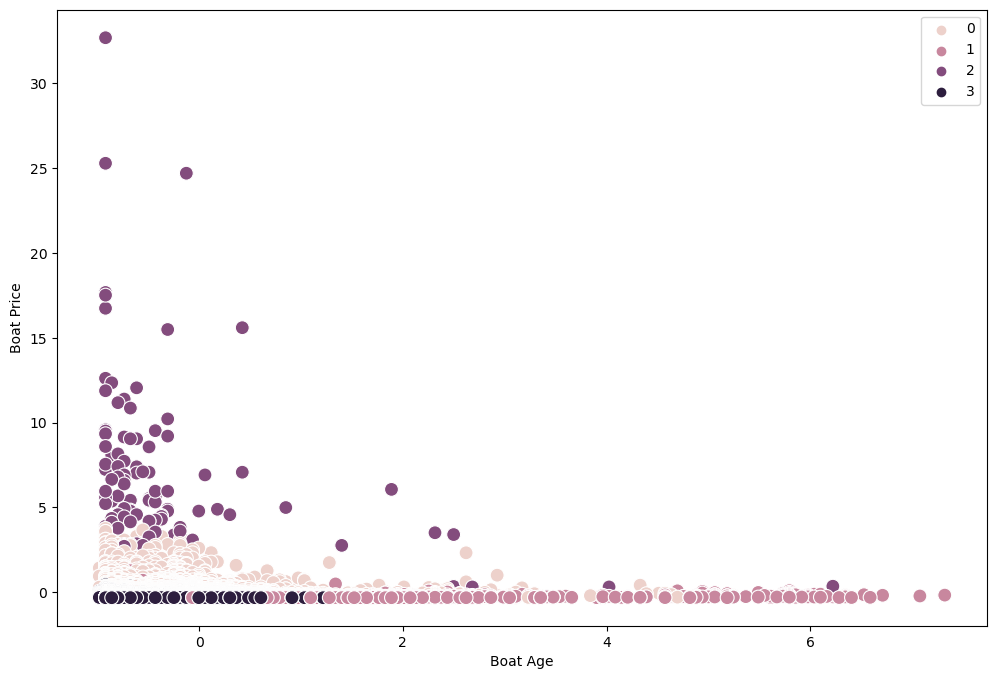

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Age'], y=df['Price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Boat Age') # Label x-axis.
plt.ylabel('Boat Price') # Label y-axis.
plt.show()

#### Note:
- The first cluster (black dots) represents new boats with higher prices.
- The second cluster (light pink) represents a high concentration of new and older boats with lower prices.
- The third cluster (pink) represents new boats with very low prices.
- The fourth cluster (purple) represents older boats with very low prices.
- Conclusion: Boat prices are decreasing with the increase of boat ages. But for some reason after
    a certain time boat prices will go flat in average.

#### 5.c. Plot the clusters for the 'Views' and 'Length' variables.

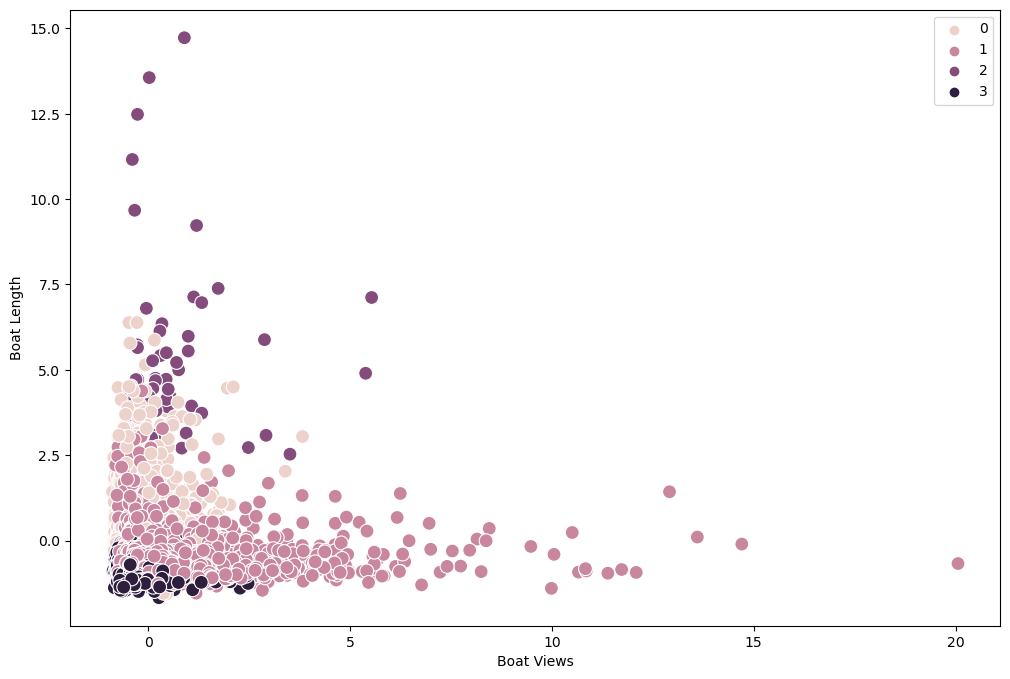

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Views'], y=df['Length'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Boat Views') # Label x-axis.
plt.ylabel('Boat Length') # Label y-axis.
plt.show()

#### Note:
- First cluster (Black) represents small number of large boats with low views.
- Second cluster (Light Pink) represents medium size boats with low views.
- Third cluster (Pink) represents very small boats with low views.
- Fourth cluster (Purple) represents medium size boats with the large number of views.
- Conclusion: most popular boats are not the luxury boats, but more likely low price boats.


### 6. Data analysis

In [23]:
# Get cluster distribution
df['clusters'].value_counts()

clusters
3    4441
0    3325
1    1358
2     109
Name: count, dtype: int64

In [24]:
df.groupby('clusters').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         'Views':['mean', 'median'],
                          'Price':['mean', 'median'],
                          'Age':['mean', 'median'],
                           })

Length               Width               Views            \
              mean    median      mean    median      mean    median   
clusters                                                               
0         0.774400  0.544976  0.903807  0.744367 -0.329629 -0.422119   
1        -0.319052 -0.430867 -0.428775 -0.458757  1.203894  0.670310   
2         4.167388  3.549239  3.480152  3.150616  0.231015 -0.093424   
3        -0.584520 -0.621032 -0.630988 -0.724274 -0.127010 -0.260994   

             Price                 Age            
              mean    median      mean    median  
clusters                                          
0         0.190824 -0.007510  0.003905 -0.126227  
1        -0.259973 -0.282063  1.463245  1.216392  
2         6.700347  5.427369 -0.251643 -0.614452  
3        -0.227828 -0.256232 -0.444189 -0.675480

#### Cluster 0 (55%)

1. Characteristic: New Small Boats
2. This cluster has low means in Price and Views. 
3. **Conclusion**: More than half of the boats fall into this category. Although they are cheap
    and new, for some reason they are not popular boats.

#### Cluster 1 (29%)

1. Characteristic: Cheap Medium size Boats
2. Slightly older than CLuster 0 boats
3. The least popular boats
4. Conclusion: Although bigger in size and cheap in price, these boats are not popular.

#### Cluster 2 (1%)

1. Characteristic: Large Expensive Boats
2. Only very small number of boats
3. Slightly new boats
4. COnclusion: This cluster represents luxury large boats, such as yacth

#### Cluster 3 (14%)

1. Characteristic: The most popular boats (very high views)
2. Mostly small size boats with cheap prices
3. Older boats
4. Conclusion: There are some numbers of small boats that are older than average, 
    but for some reason attract a large number of viewers. This could be because of the type
    of the boat, or the material used to make the boat.

### 7. Summary

- Clustering are very useful when we do not know the relationship of each variable in the data set. 
(such as boat price and boat size)
- Clustering provides a way to see the grouping of certain relationships and give new insights of 
the data. (ie: what are the elements of most popular boats?)

In [84]:
# Export the modified dataframe
df1.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'boat_data_cluster.csv'))

In [86]:
df1

,Boat Type,Length,Width,Views,Price,Country,Age,Condition,Cluster
0,Motor Yacht,4.00,1.90,226,3667.363,Switzerland,7,new,2
1,Center console boat,4.00,1.50,75,3751.750,Germany,4,new,2
2,Sport Boat,3.00,1.00,64,3703.700,Denmark,4,new,2
3,Fishing Boat,3.55,1.46,58,3653.925,Germany,5,new,2
4,Catamaran,6.20,2.38,474,3956.400,Switzerland,25,Used,3
...,...,...,...,...,...,...,...,...,...
9228,Fishing Boat,6.00,1.62,288,5440.050,Switzerland,40,Used,3
9229,Sport Boat,6.30,2.44,1116,5385.100,Switzerland,37,Used,3
9230,Sport Boat,4.40,1.80,354,4836.425,Germany,4,new,2
9231,Pontoon Boat,4.37,1.89,266,4622.500,Italy,6,new,2


### End of Boat Analysis Part 5